In [39]:
import pandas as pd
import altair as alt
from matplotlib import pyplot
#df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv',index_col='Province/State')
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',parse_dates=True)

In [40]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [41]:
df.drop(labels=['Province/State','Country/Region' ,'Lat','Long'],inplace=True, axis=1)

In [42]:
tot = df.sum()

In [43]:
tot

1/22/20       555
1/23/20       654
1/24/20       941
1/25/20      1434
1/26/20      2118
            ...  
3/20/20    272164
3/21/20    304519
3/22/20    337089
3/23/20    378547
3/24/20    418678
Length: 63, dtype: int64

In [44]:
tot.columns = ['ds','y']

In [45]:
df2 = pd.DataFrame(tot, columns=['y'])



df2

In [46]:
df2['diff'] = df2.diff()

In [47]:
df2.dropna()

,y,diff
1/23/20,654,99.0
1/24/20,941,287.0
1/25/20,1434,493.0
1/26/20,2118,684.0
1/27/20,2927,809.0
...,...,...
3/20/20,272164,29458.0
3/21/20,304519,32355.0
3/22/20,337089,32570.0
3/23/20,378547,41458.0


In [48]:
df2['growth'] = df2['diff'] / df2['y']

In [49]:
df2

,y,diff,growth
1/22/20,555,NaN,NaN
1/23/20,654,99.0,0.151376
1/24/20,941,287.0,0.304995
1/25/20,1434,493.0,0.343794
1/26/20,2118,684.0,0.322946
...,...,...,...
3/20/20,272164,29458.0,0.108236
3/21/20,304519,32355.0,0.106250
3/22/20,337089,32570.0,0.096621
3/23/20,378547,41458.0,0.109519


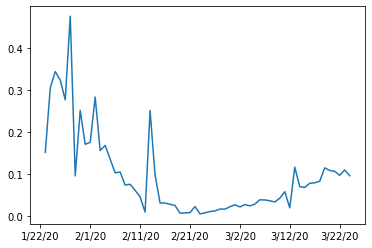

In [50]:
df2['growth'].plot()

In [51]:
df2['growth'].mean()

0.09508592083901751

In [52]:
f = (418678 * 1.1)

In [65]:
days=[]
for i in range (100):
    #print(i)
    y = 418678 * (1.09508592083901751 ** i)
    #print(int(y))
    days.append(int(y))


In [66]:
days

[418678,
 458488,
 502084,
 549825,
 602105,
 659357,
 722053,
 790710,
 865895,
 948230,
 1038393,
 1137130,
 1245255,
 1363661,
 1493326,
 1635321,
 1790817,
 1961098,
 2147571,
 2351775,
 2575396,
 2820280,
 3088449,
 3382117,
 3703708,
 4055879,
 4441536,
 4863863,
 5326348,
 5832809,
 6387427,
 6994782,
 7659887,
 8388235,
 9185838,
 10059281,
 11015778,
 12063223,
 13210266,
 14466376,
 15841925,
 17348269,
 18997845,
 20804272,
 22782466,
 24948758,
 27321033,
 29918879,
 32763743,
 35879114,
 39290713,
 43026706,
 47117940,
 51598193,
 56504455,
 61877233,
 67760887,
 74203993,
 81259748,
 88986406,
 97447761,
 106713671,
 116860638,
 127972440,
 140140817,
 153466236,
 168058714,
 184038732,
 201538224,
 220701672,
 241687294,
 264668353,
 289834587,
 317393776,
 347573455,
 380622797,
 416814666,
 456447873,
 499849639,
 547378302,
 599426272,
 656423271,
 718839883,
 787191435,
 862042258,
 944010339,
 1033772432,
 1132069636,
 1239713519,
 1357592821,
 1486680785,
 16280431

In [67]:
df3 = pd.DataFrame(days)

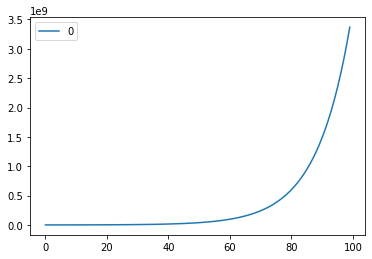

In [68]:
df3.plot()